In [2]:
import pandas as pd 
import numpy as np 
# iris 데이터 불러오기 위한 datasets 설치 
from sklearn import datasets


In [4]:
# skearn.datasets에 포함된 iris(붓꽃) 데이터 가져오기 
iris = datasets.load_iris() 

# iris 데이터 내 data값들 
data= pd.DataFrame(iris.data) ; data 

# iris데이터의 feature 이름 
feature= pd.DataFrame(iris.feature_names) ; feature 

# data의 컬럼명을 feature이름으로 수정하기 
data.columns = feature[0] 

# 세가지 붓꽃의 종류 
target=pd.DataFrame(iris.target) ; target 

# 컬럼명 바꾸기 
target.columns=['target'] 

# data와 target 데이터프레임을 합치기 (axis=1, columns으로 합치기) 
df= pd.concat([data,target], axis=1) 
df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


1


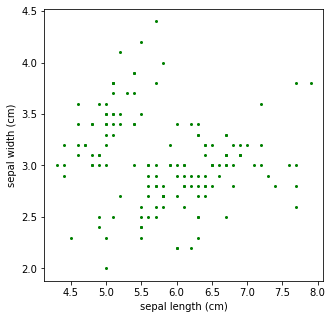

2


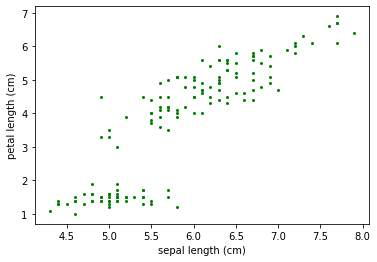

3


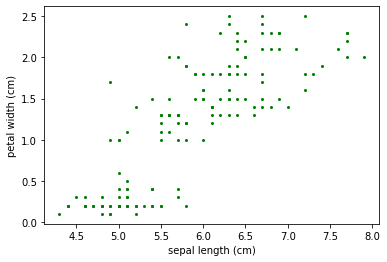

In [41]:
from matplotlib import pyplot as plt
df_f = df.copy()

# 2차원 그리기 
fig = plt.figure(figsize=(5,5)) 
X = df_f 
for col_n in range(1,4):
    print(col_n)
    plt.plot( X.iloc[:,0] , X.iloc[:,col_n] , 'o' , markersize=2 , color='green' ) 
    plt.xlabel(data.columns[0] ) 
    plt.ylabel(data.columns[col_n] ) 
    plt.show()

X= sepal length (cm) Y= sepal width (cm) Z= petal width (cm)


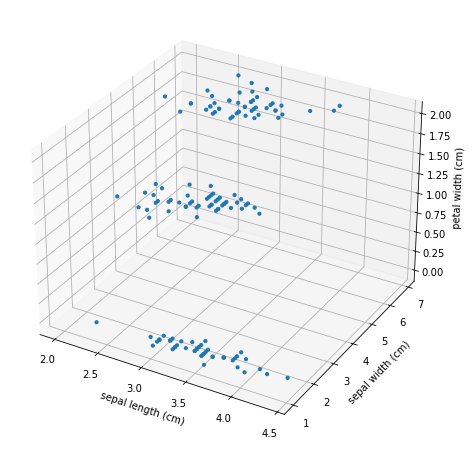

In [43]:
# 3차원 그리기 
fig = plt.figure(figsize=(8, 8)) 
ax = fig.add_subplot(111, projection='3d') 
X = df_f 
# 3d scatterplot 그리기 
print('X=',data.columns[0] ,'Y=', data.columns[1] , 'Z=',data.columns[3] )
ax.scatter( X.iloc[:,1] , X.iloc[:,2] , X.iloc[:,4] 
           ,s=10 #사이즈 
           ,cmap="orange" #컬러맵 
           ,alpha=1 #투명도 
          ) 

ax.set_xlabel(data.columns[0] )
ax.set_ylabel(data.columns[1] )
ax.set_zlabel(data.columns[3] )

plt.show()

C:\Users\sususu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


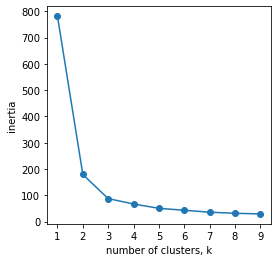

In [8]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_f)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()



In [9]:
# K-Means 모델과 군집 예측값을 생성 
# 클러스터 모델 생성 파라미터는 원할 경우 추가 
clust_model = KMeans(n_clusters = 3 # 클러스터 갯수                                         
                     , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴 
                     , max_iter=50 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다 
                     , random_state = 42) 
# 생성한 모델로 데이터를 학습시킴 
clust_model.fit(df_f) 

# 결과 값을 변수에 저장 
centers = clust_model.cluster_centers_ # 각 군집의 중심점 
pred = clust_model.predict(df_f) # 각 예측군집 
print(pd.DataFrame(centers)) 
print(pred[:10])

          0         1         2         3         4
0  6.622449  2.983673  5.573469  2.032653  2.000000
1  5.006000  3.428000  1.462000  0.246000  0.000000
2  5.915686  2.764706  4.264706  1.333333  1.019608
[1 1 1 1 1 1 1 1 1 1]


In [10]:
# 원래 데이터에 예측된 군집 붙이기 
clust_df = df_f.copy() 
clust_df['clust'] = pred 
clust_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,clust
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


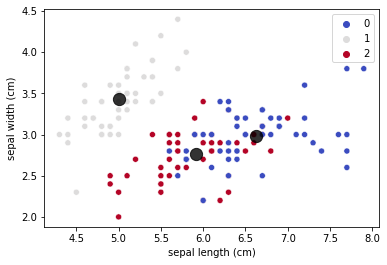

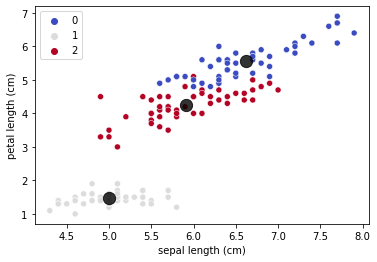

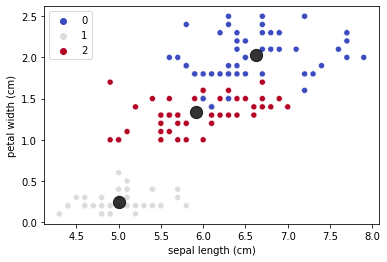

In [18]:
import seaborn as sns


X = clust_df


sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], data=df_f, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,1], c='black', alpha=0.8, s=150)
plt.show()


sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=df_f, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150)
plt.show()

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,3], data=df_f, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,3], c='black', alpha=0.8, s=150)
plt.show()

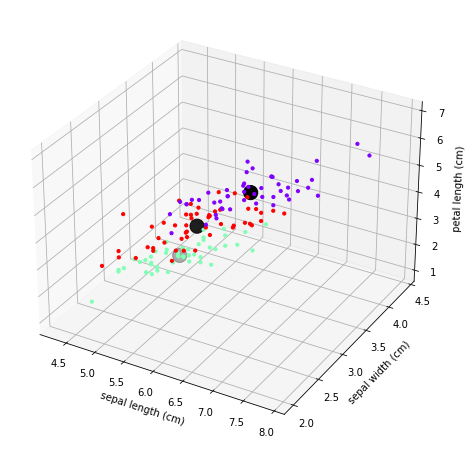

In [44]:
# 3차원으로 시각화하기
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
X = clust_df

# 데이터 scatterplot 
ax.scatter( X.iloc[:,0] , X.iloc[:,1] , X.iloc[:,2] , c = X.clust , s = 10 , cmap = "rainbow" , alpha = 1 )

# centroid scatterplot 
ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200)

ax.set_xlabel(data.columns[0] )
ax.set_ylabel(data.columns[1] )
ax.set_zlabel(data.columns[2] )

plt.show()

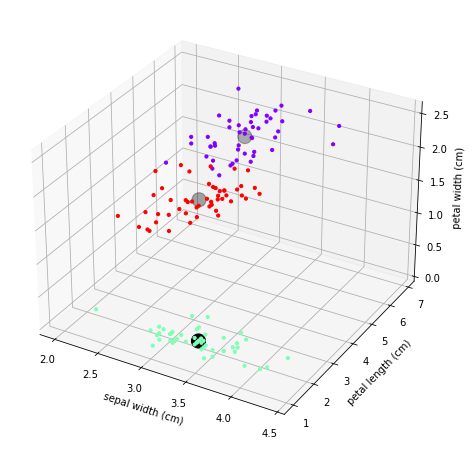

In [47]:
# 3차원으로 시각화하기
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
X = clust_df

# 데이터 scatterplot 
ax.scatter( X.iloc[:,1] , X.iloc[:,2] , X.iloc[:,3] , c = X.clust , s = 10 , cmap = "rainbow" , alpha = 1 )

# centroid scatterplot 
ax.scatter(centers[:,1],centers[:,2],centers[:,3] ,c='black', s=200)

ax.set_xlabel(data.columns[1] )
ax.set_ylabel(data.columns[2] )
ax.set_zlabel(data.columns[3] )

plt.show()

In [22]:
cluster_mean= clust_df.groupby('clust').mean() 
cluster_mean


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
clust,,,,,
0,6.622449,2.983673,5.573469,2.032653,2.000000
1,5.006000,3.428000,1.462000,0.246000,0.000000
2,5.915686,2.764706,4.264706,1.333333,1.019608
